![](img/fff.PNG)



<a id='section0'></a>


# Machine learning for Big Data


#### Dr. Turki Aljrees , 

_11/08/2019_

 ---

In this page we will use Python for ML on Big Data, and the topics are  :
    
   [1) - Big data and Machine Learning Using SciKit-Learn](#section1)
   
   [2) - model training, cross-validation and predicting](#section2)
   
   [3) - Big Data  Visualisation** _These are important tasks before Big Data Visualisation:](#section3)
   
        . Modeling Overview 
        
        .. Introduce the Data
        
        ... Basic Data Cleaning
        
        .... More Data Exploration
        
        ..... Visualation
    
   [4) - K-means Clusters ](#section4)
    

---

![](img/sk.png)

<a id='section1'></a>

# Using SciKit-Learn

machine learning called **predictive modeling.** by the scikit-learn library in Python to focused making accurate predictions 


**pre-requirement** Installing Python and , or  <a href="https://www.continuum.io/downloads"> Anaconda Installer</a>,  Using Jupyter Notebooks/Lab, and finally Importing Libraries and Modules

---

In [1]:
from pandas import read_csv
from numpy import set_printoptions 

 use CSV files. The data from a SQL Server data warehouse training database. 


In the code below we are reading a csv file. Notice that we are not specifying a path. So, how does the notebook know where the csv file is? Because we've placed it in the working directory. 

You can use the os.getwd() function to see where your working directory is. 

In [2]:
filename = 'BBC.csv'
dataframe = read_csv(filename) 

In [3]:

import os

print(os.getcwd())

C:\Users\turki2\Desktop\SharedFile\TurkiPythonProject\New folder\SciKitDownload


---

The **df** is just a variable for holding the csv file. In a few cells below this one we will call the variable dataframe. 

In [5]:
df = read_csv('./BBC.csv')





For example, we can run dataframe.head(25) to return the top 25 rows. 

---

In [6]:
dataframe.tail(5)

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
18479,4,1,30000,1,0,4,1,0,1,3,58,1
18480,4,2,30000,3,0,4,1,0,1,3,56,1
18481,4,1,30000,3,0,4,0,0,1,3,57,1
18482,5,1,30000,3,0,5,1,0,1,3,58,1
18483,5,1,30000,0,0,5,1,0,1,3,57,1


---

we can use ``dataframe.shape`` to investigate data. for how many attributes .etc. using __shape__ for the number  columns in rows are in our data set.

In [7]:
dataframe.shape

(18484, 12)

---

descriptive statistics by ``dataframe.describe()``  to find  **mean** = average ,  **median** = values or **mode** appears most often in a set of numbers

In [8]:
dataframe.describe()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,3.310106,1.494103,57305.777970,1.844352,1.004058,3.310106,0.676369,1.502705,6.003246,1.789710,54.603928,0.494049
std,1.426147,0.499979,32285.841703,1.612408,1.522660,1.426147,0.467874,1.138394,6.382562,0.872664,11.255252,0.499978
min,1.000000,1.000000,10000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,36.000000,0.000000
25%,2.000000,1.000000,30000.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,46.000000,0.000000
50%,3.000000,1.000000,60000.000000,2.000000,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,53.000000,0.000000
75%,5.000000,2.000000,70000.000000,3.000000,2.000000,5.000000,1.000000,2.000000,10.000000,3.000000,62.000000,1.000000
max,5.000000,2.000000,170000.000000,5.000000,5.000000,5.000000,1.000000,4.000000,20.000000,3.000000,106.000000,1.000000


---

we can use ``array`` to assign dataframe to an array. 

In [9]:
array = dataframe.values

---

example , we can use assing X or  y to an array like `` X = array[:,0:11]  ``  to include all items in the array from 0 to 11. or ``Y = array[:,11]`` use the column in the array mapped to the __11th row__. The __BikeBuyer__ column. 

In [10]:
X = array[:,0:11] 
Y = array[:,11]

---

**Note that** We are using group by to view the distribution of values in our __BikeBuyer__ column. Recall that this column is our **target variable**. trying to predict.  This is  important to scoring the model. Classiﬁcation accuracy is the number of correct predictions made as a ratio of all predictions made. Note Also __Accuracy__ useful when there are an even distribution of values in a data set. 

In [13]:
print(dataframe.groupby('BikeBuyer').size())

BikeBuyer
0    9352
1    9132
dtype: int64


In [25]:
print(dataframe.groupby('NumberCarsOwned').size())

NumberCarsOwned
0    4238
1    4883
2    6457
3    1645
4    1261
dtype: int64


In [26]:
print(dataframe.groupby('NumberChildrenAtHome').size())

NumberChildrenAtHome
0    11116
1     2460
2     1648
3     1204
4     1089
5      967
dtype: int64


---

![](img/TEST.png)

## train_test_split

first we need to import ``from sklearn.svm import SVC`` then we need __train_test_split__ by the use of ``from sklearn.model_selection import train_test_split ``
becuse the Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.




---

## Why SVM? 
a powerful supervised learning algorithm for classification or for regression, and they draw a boundary between clusters of data. <a href="https://www.youtube.com/watch?v=eUfvyUEGMD8&t=21s"> we can raed here more about the SVM </a>



In [14]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 

---

# role of 25 and 75 

Split the data in 2, one for test and one for training 

- test size is 25% of the data 

- training size is 75% of the data. 

use `` test_size = 0.25 `` or `` seed = 7 `` to specifying the sizes. 



In [15]:
test_size = 0.25
seed = 7

Then we nade to name the data to  creating the split. use ``test_size=test_size `` and ``random_state=seed``

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

---

use ``model = SVC()`` Next creating  model for the SVC algorithm  for the  variable . 

In [17]:
model = SVC()

---

## Fitting the module 

 Simply use `` model.fit(X_train, Y_train) `` to fit your module 


#### result can be seen here:
<br>
<br>

In [18]:
model.fit(X_train, Y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

---



## save result :

Use ``result = model.score(X_test, Y_test)`` to get the results of model saved .

![](img/re.png)

In [19]:
result = model.score(X_test, Y_test)

---

### Accuracy 

Use `` print(("Accuracy: %.3f%%") % (result*100.0)) `` to print the accuracy of the model. __see result bellow__

In [21]:
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 79.139%


---

![](img/end.jpg)

### The End and Put all together   


**Finally**  we need to put all work together for best coding practices as bellow 


In [27]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

filename = 'BBC.csv'
dataframe = read_csv(filename) 

array = dataframe.values
X = array[:,0:11] 
Y = array[:,11]

test_size = .30
seed = 45
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = RandomForestClassifier()
model.fit(X_train, Y_train) 

result = model.score(X_test, Y_test)

print(("Accuracy: %.3f%%") % (result*100.0))


Accuracy: 78.525%


---

# Optional 

You may woudl like to use  use a different **algorithim** to test . So simply re-run the  ``entire model in one cell``.  **Note** to make two additional steps to _(substitue)_ another model. 

so we can include do :

``` python
    #Import the new model. 
    
    from sklearn.neighbors import KNeighborsClassifier) 
    
    #- Map the model variable to our new algorithm. 
    
    model = KNeighborsClassifier()) 
```

To changed To bellow cod :


In [24]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

filename = 'BBC.csv'
dataframe = read_csv(filename) 

array = dataframe.values
X = array[:,0:11] 
Y = array[:,11]

test_size = .30
seed = 45
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = SVC()
model.fit(X_train, Y_train) 

result = model.score(X_test, Y_test)

print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 78.164%


In [31]:
"HI " * 10

'HI HI HI HI HI HI HI HI HI HI '

In [36]:
if (3 > 2):
    print("hello")
else:
    print("goodbye")
  

hello


In [ ]:
ORIGINAL DATA 
Pre-Process
Module (ALgorthim)
Test / Train 
Prediction 
Valedation 

-Programe 
we have an OBJECT (O)that have 
we have a Variables (V)
we have a Conditional (C) statments to do diffrent things (based on variables)
we have a Functions (F)
we have a Representation (R) for characters and number and often (Table wise) 
We have an Array (A) (can store multiple variables)


*** learn to use data structure in Python (such as index , slicing in sequences ..ect )

---

<a id='section2'></a>

# Model training, Cross-validation and Predicting

![](img/train_test_split.png)

CatBoost (for  model training, cross-validation and predicting,), you can do so by running the following cell 

In [ ]:
from catboost import CatBoostClassifier, Pool, cv

In [ ]:
from sklearn.metrics import accuracy_score

# 2.1 Model Training

Now we will create the model itself: 

We would go here with default parameters (as they provide a really good baseline almost all the time), 
the only thing We would like to specify here is custom_loss parameter, 
as this would give us an ability to see what's going on in terms of this competition metric - accuracy, 
as well as to be able to watch for logloss, 
as it would be more smooth on dataset of such size.

In [ ]:
model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent'
)

In [ ]:
model.fit(
    X_train, Y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, Y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);



As you can see, it is possible to watch our model learn through verbose output 
or with nice plots 

(personally I would definately go with the second option - just check out those plots: you can, for example, zoom in areas of interest!)

With this we can see that the best accuracy value of 0.8341 
(on validation set)
was acheived on 503th boosting step.


# 2.2 Model Cross-Validation¶ 

Good to validate our model,

but to cross-validate it - even better. 

And also with plots! NEXT

In [ ]:
cv_data = cv(
    Pool(X_train, Y_train, cat_features=categorical_features_indices),
    model.get_params(),
    plot=True
)



Now we have values of our loss functions at each boosting step averaged by 10 folds, which should provide us with a more accurate estimation of our model performance:


In [ ]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))



As we can see, our initial estimation of performance on single validation fold was too optimistic - that is why cross-validation is so important!


# 2.3 Model Applying 

we get predictions is

In [ ]:
predictions = model.predict(X_train)
predictions_probs = model.predict_proba(X_train)
print(predictions[:10])
print(predictions_probs[:10])

# 3.8 Feature  

In [ ]:
print(pd.get_dummies(X['education']).head(5))

#Decide which categorical variables you want to use in model


In [ ]:
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

In [ ]:
print(X['native_country'].value_counts().sort_values(ascending=False).head(10))

---

## Breake ,, relax for few minutes

In [ ]:
## this is break game , to learn somth.

In [ ]:
name = input("Enter Your Name:")
print("Hello", name)


---

<a id='section3'></a>

# Data  Visualisation

![](img/maxresdefault.jpg)

<br>

[Return to Top of the page ](#section0)

Note **This tutorial part of my Data Science and Machine learign expermints on Big Data. These procedure are useful and can be used to make a discovery, test a hypothesis, or demonstrate a known fact.**

<br><br>

#### Data visualization is the presentation of data in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.


These are important and the initial tasks in general to achive the overall Aim (Big Data Visualisation) :

**Note** that we need to run some data cleaning tasks before applyin gany data visualaisation technique:


1. Modeling Overview 
2. Introduce the Data
3. Basic Data Cleaning
4. More Data Exploration
5. Visualation
<br><br>

<br>
 - Data used from first project basic [cleaining](http://localhost:8888/notebooks/Documents/Jupyter%20Notebook/PhDFinalFolder/Codes/WP11/CleanignTask.ipynb) tasks :
 
     - Or any Data can be used from first project :
     
         - **Crime_BigData.csv** Original 
                 
         - **IntNoDum.csv** Num not dummies  
                 
         - **df_int.csv** dummies , null exisit 
               
         - **dummiesNum.csv**  Num , missing values Exisited,
         
         - **dummiesScaled.csv** no missing values,  dummies,  not scaled
               
         
   Emphasis: Use this code: Bold: __string__ or **string** Italic: _string_ or *string*  
         


### Required libraries:

Note : its importnat and to import and install library as fundamental package for scientific computing with Python.

In [10]:
### Import the required libraries
import json
import csv
import time
import calendar
import sklearn
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import datetime as datetime
from collections import defaultdict

ModuleNotFoundError: No module named 'sklearn'

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import scipy

import missingno
import geoplot as gplt
import geopandas as gpd
from shapely.geometry import Point
import missingno as msno
import geoplot as gplt




import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

from pandas import read_csv

%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import os
os.chdir("your folder project path")

# here i can use many data as i need 
data = read_csv("your folder project path.csv",error_bad_lines=False,nrows = 10000)
df = read_csv("your folder project path.csv",error_bad_lines=False,nrows = 10000)
crimes = read_csv("your folder project path.csv",error_bad_lines=False,nrows = 10000)

b'Skipping line 7851: expected 19 fields, saw 20\n'
b'Skipping line 7851: expected 19 fields, saw 20\n'
b'Skipping line 7851: expected 19 fields, saw 20\n'


**NOTE**
in the read_csv() function below, please see nrows = 10000, that means I am only reading 10000 rows to save time and run the model, as with more data, more time will be required to train the clustering algorithm. 
we can chaange it back or remove this part (all data) as per our own choice.

---

###   the data 

In [3]:
df =data

In [323]:
#and before scaling also drop index=0
df.drop(['Northing'],axis=1, inplace=True)

In [328]:
NumericalNaNs = pd.read_csv("NumericalNaNs.csv",error_bad_lines=False,nrows = 10000)

In [ ]:
msno.geoplot(data, x='Northing', y='Easting')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 17, 6
plt.style.use('bmh')

In [ ]:
missingno.bar(data, sort='ascending', figsize = (30,5))

missingno.matrix(data, figsize = (30,5))

missingno.dendrogram(data)

missingno.heatmap(data)

#missingno.mapped(data)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Offence", data=data.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

In [93]:
from matplotlib import pyplot as PLT

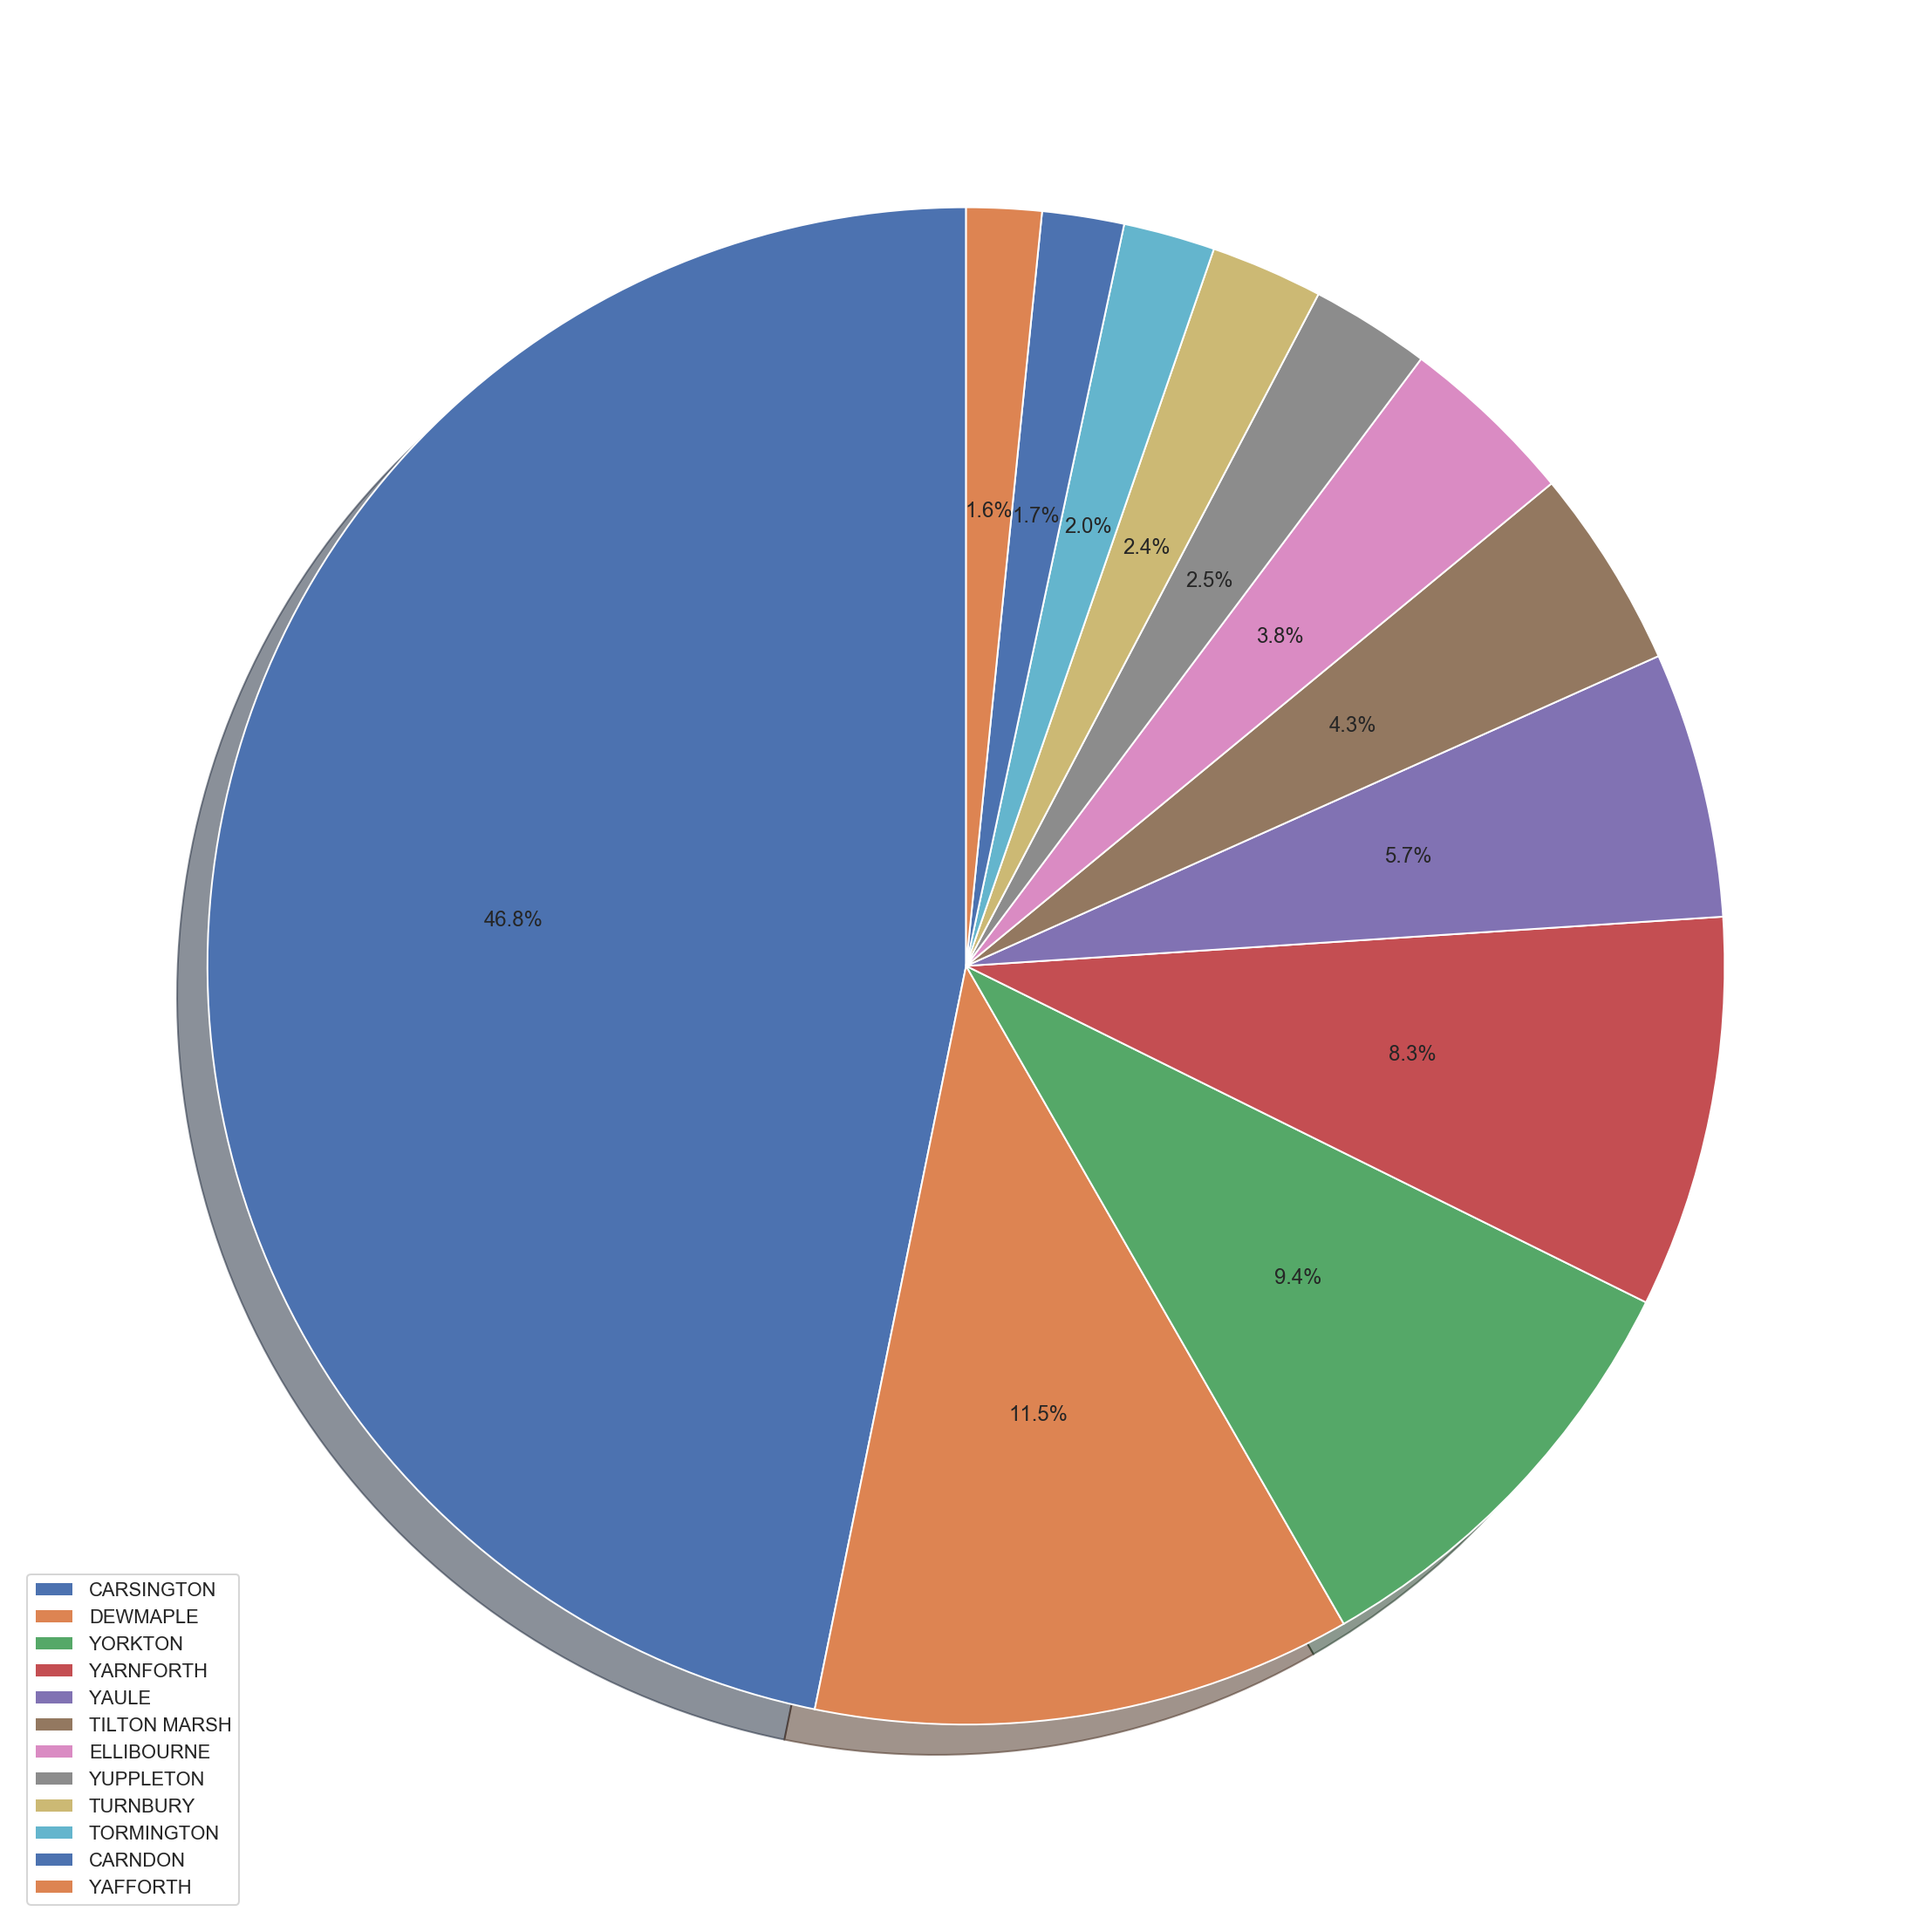

In [102]:
labels = ttcrime_count['Town']
values = ttcrime_count['counts']

explode = (0.1,) + tuple([0 for i in range(9)])

plt.figure(figsize=(20,20))
plt.pie(values, explode = None , labels=None, autopct='%1.1f%%', shadow=True, startangle= 90)
plt.legend(loc=3, labels=labels)
plt.show()

In [ ]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


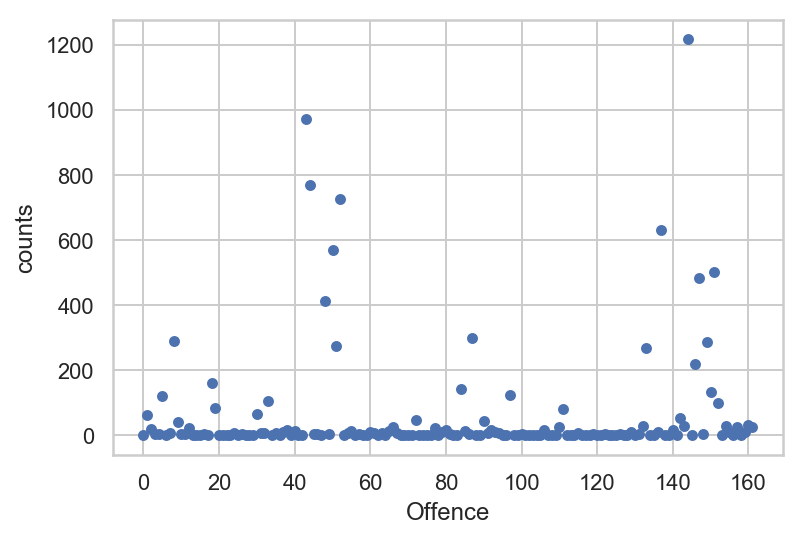

In [231]:
df1.plot.scatter(x='Offence', y='counts');

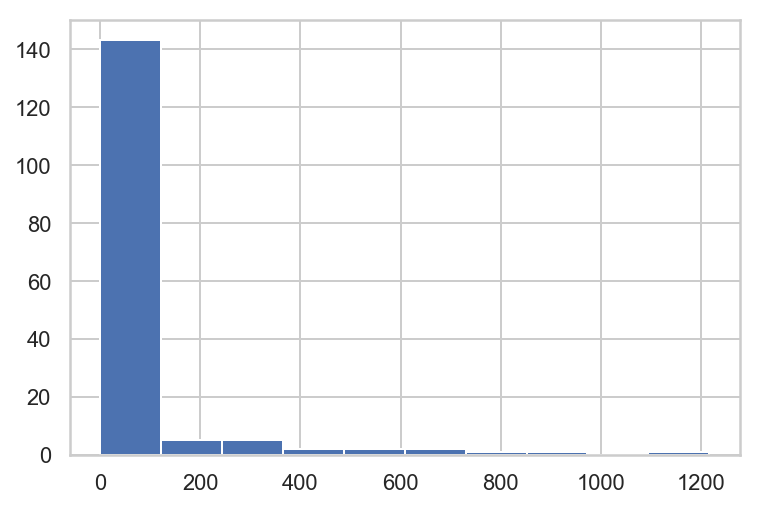

In [233]:
df1.counts.hist()
plt.show()

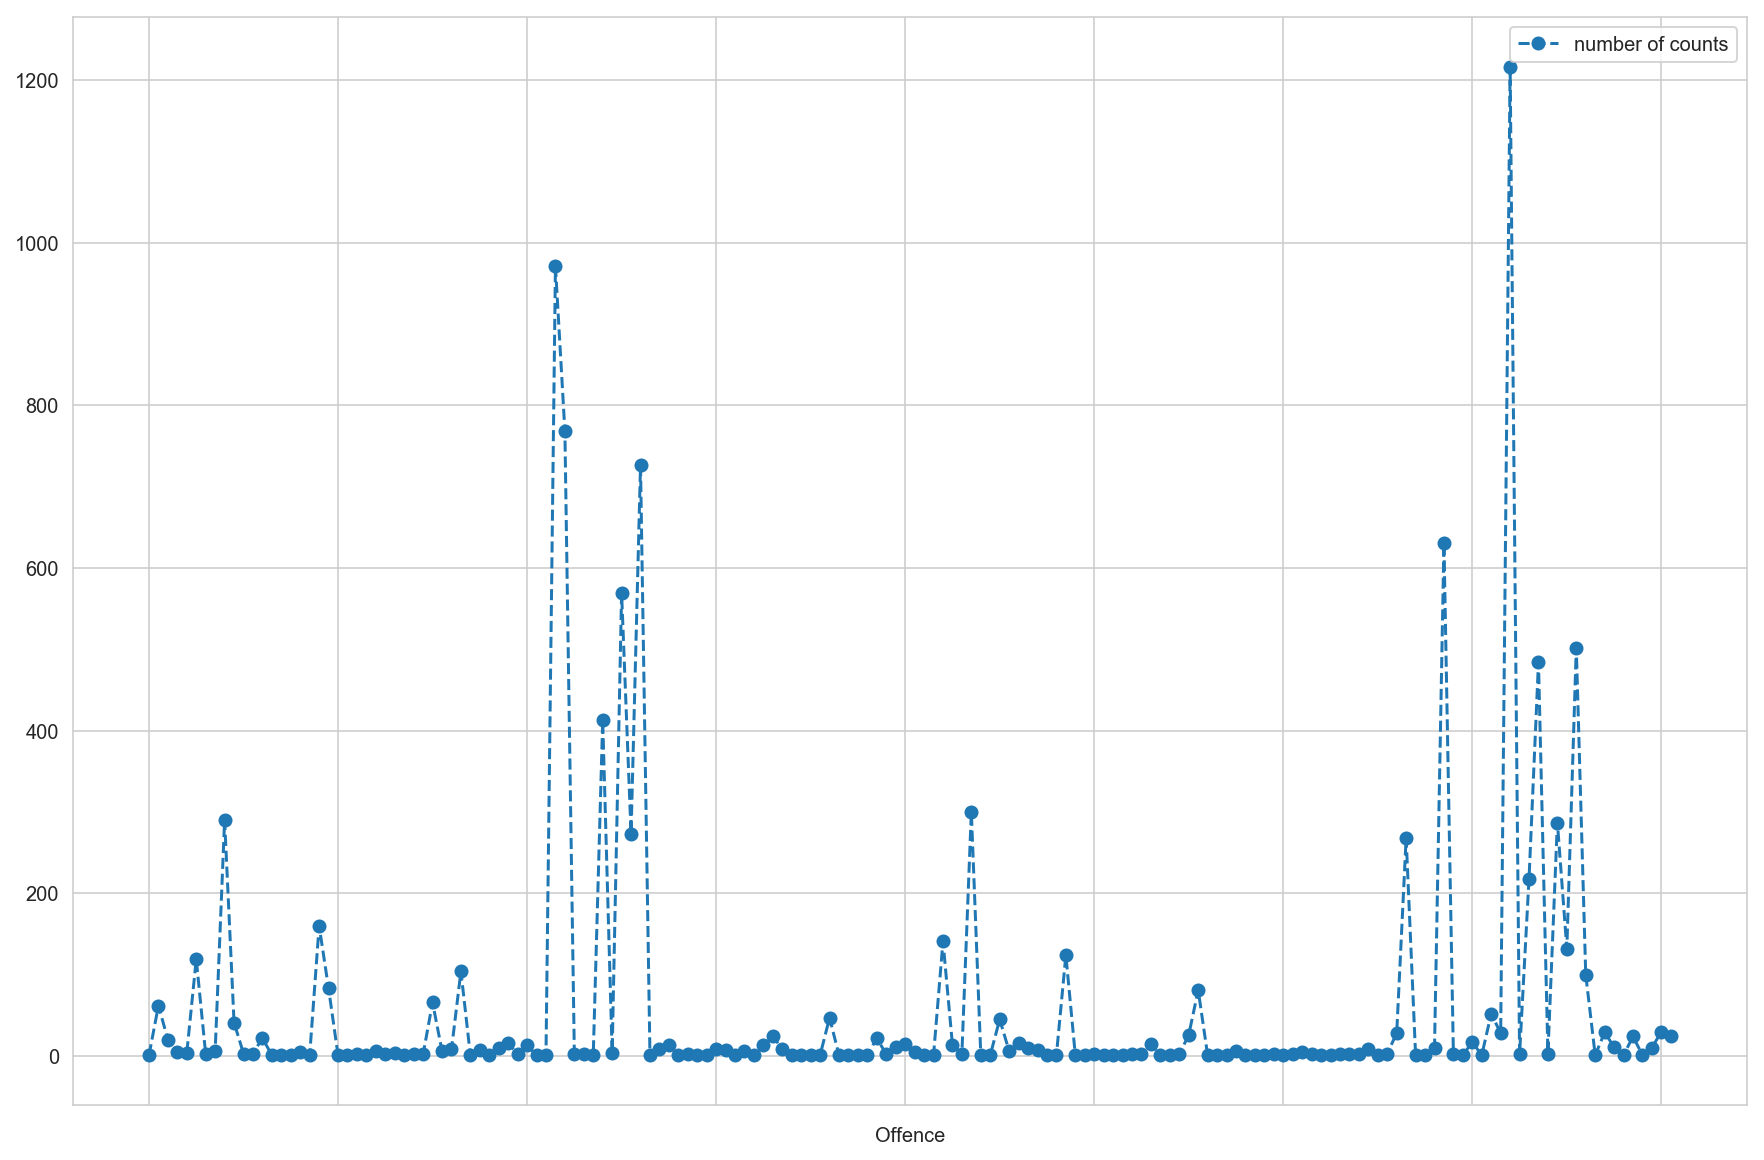

In [10]:
# Plot 1: Number of outcomes per month
# ==========================================================================

plot1 = df.groupby('Offence').size().reset_index(name='number of counts').set_index('Offence')
plot1
plot1.plot(kind="line",figsize=(15,10), linestyle='--', marker='o')



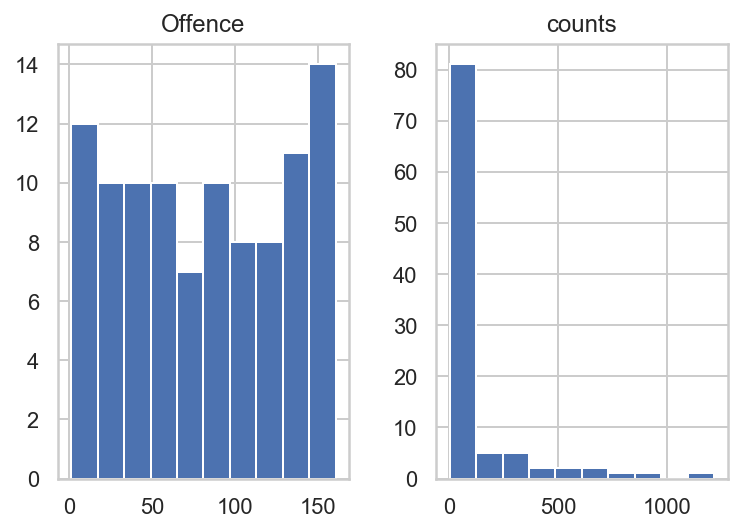

In [237]:
# histograms
#data=data.iloc[:10, :],
#data.iloc[:10, :].hist()
df1.iloc[:100, :].hist()
plt.show()

In [ ]:
# Plot 1: Number of outcomes per month
# ==========================================================================

plot1 = NumericalNaNs.groupby('Offence').size().reset_index(name='number of counts').set_index('Offence')
plot1
plot1.plot(kind="line",figsize=(15,10), linestyle='--', marker='o')



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


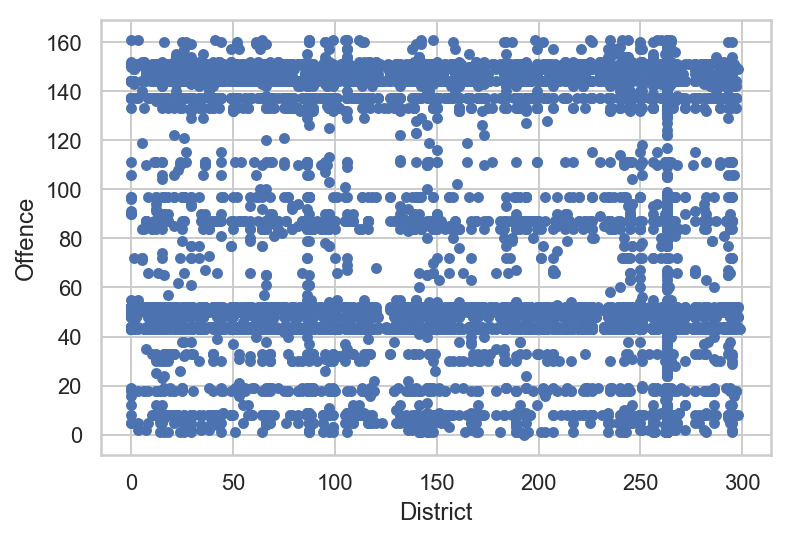

In [259]:
NumericalNaNs.plot.scatter(x='District', y='Offence');

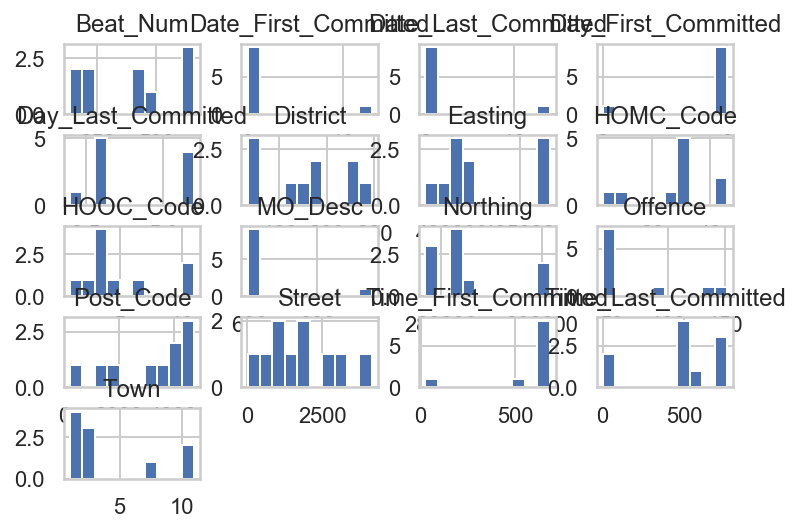

In [261]:
NumericalNaNs.iloc[:10, :].hist()
plt.show()

In [262]:
import plotly.plotly as py
import plotly.tools as tls

import random
import numpy
import matplotlib.pyplot as plt

histogram=plt.figure()

x = NumericalNaNs.iloc[:100, :]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

plt.hist(x, bins, alpha=0.5)
plt.hist(y, bins, alpha=0.5)

plotly_fig = tls.mpl_to_plotly( histogram )
py.iplot(plotly_fig,  filename='histogram-mpl-same')

C:\Users\taljr\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



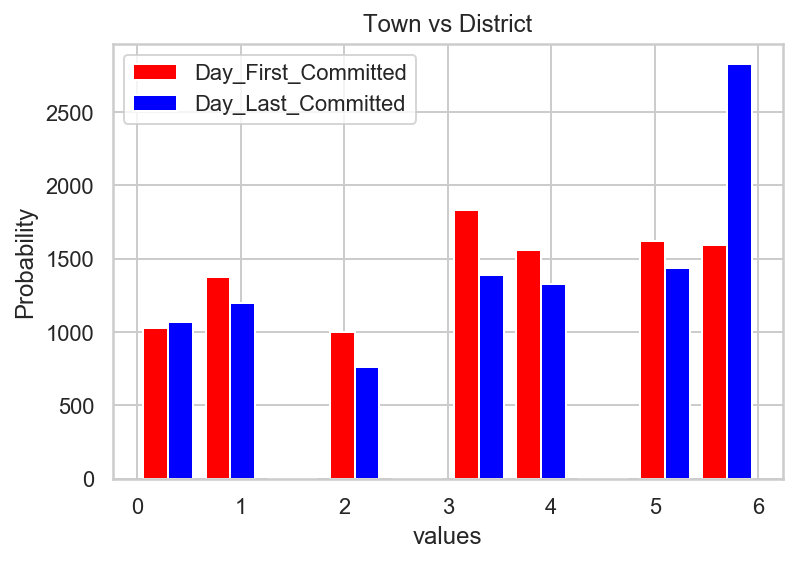

In [263]:
d = NumericalNaNs
score_Town = d['Day_First_Committed']
legend = ['Day_First_Committed', 'Day_Last_Committed']
score_District = d['Day_Last_Committed']
plt.hist([score_Town, score_District], color=['red', 'blue'])
plt.legend(legend)
#plt.xticks(range(0, 7))
#plt.yticks(range(1, 20))
plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Town vs District')
plt.show()

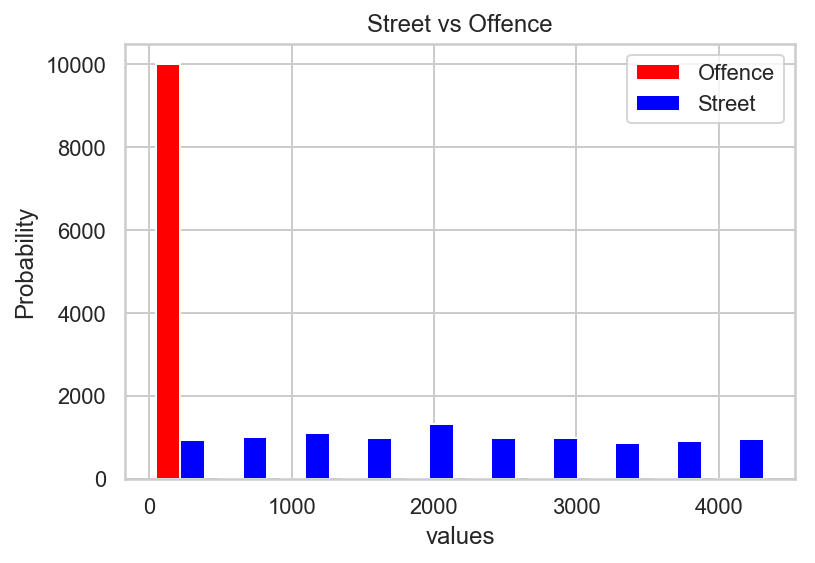

In [264]:
d = NumericalNaNs
score_Town = d['Offence']
legend = ['Offence', 'Street']
score_District = d['Street']
plt.hist([score_Town, score_District], data=data.iloc[:10, :], color=['red', 'blue'])
plt.legend(legend)
#plt.xticks(range(0, 7))
#plt.yticks(range(1, 20))
plt.xlabel('values')
plt.ylabel('Probability')
plt.title('Street vs Offence')
plt.show()

In [265]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [266]:
from pylab import rcParams
rcParams['figure.figsize'] = 17, 6
plt.style.use('bmh')

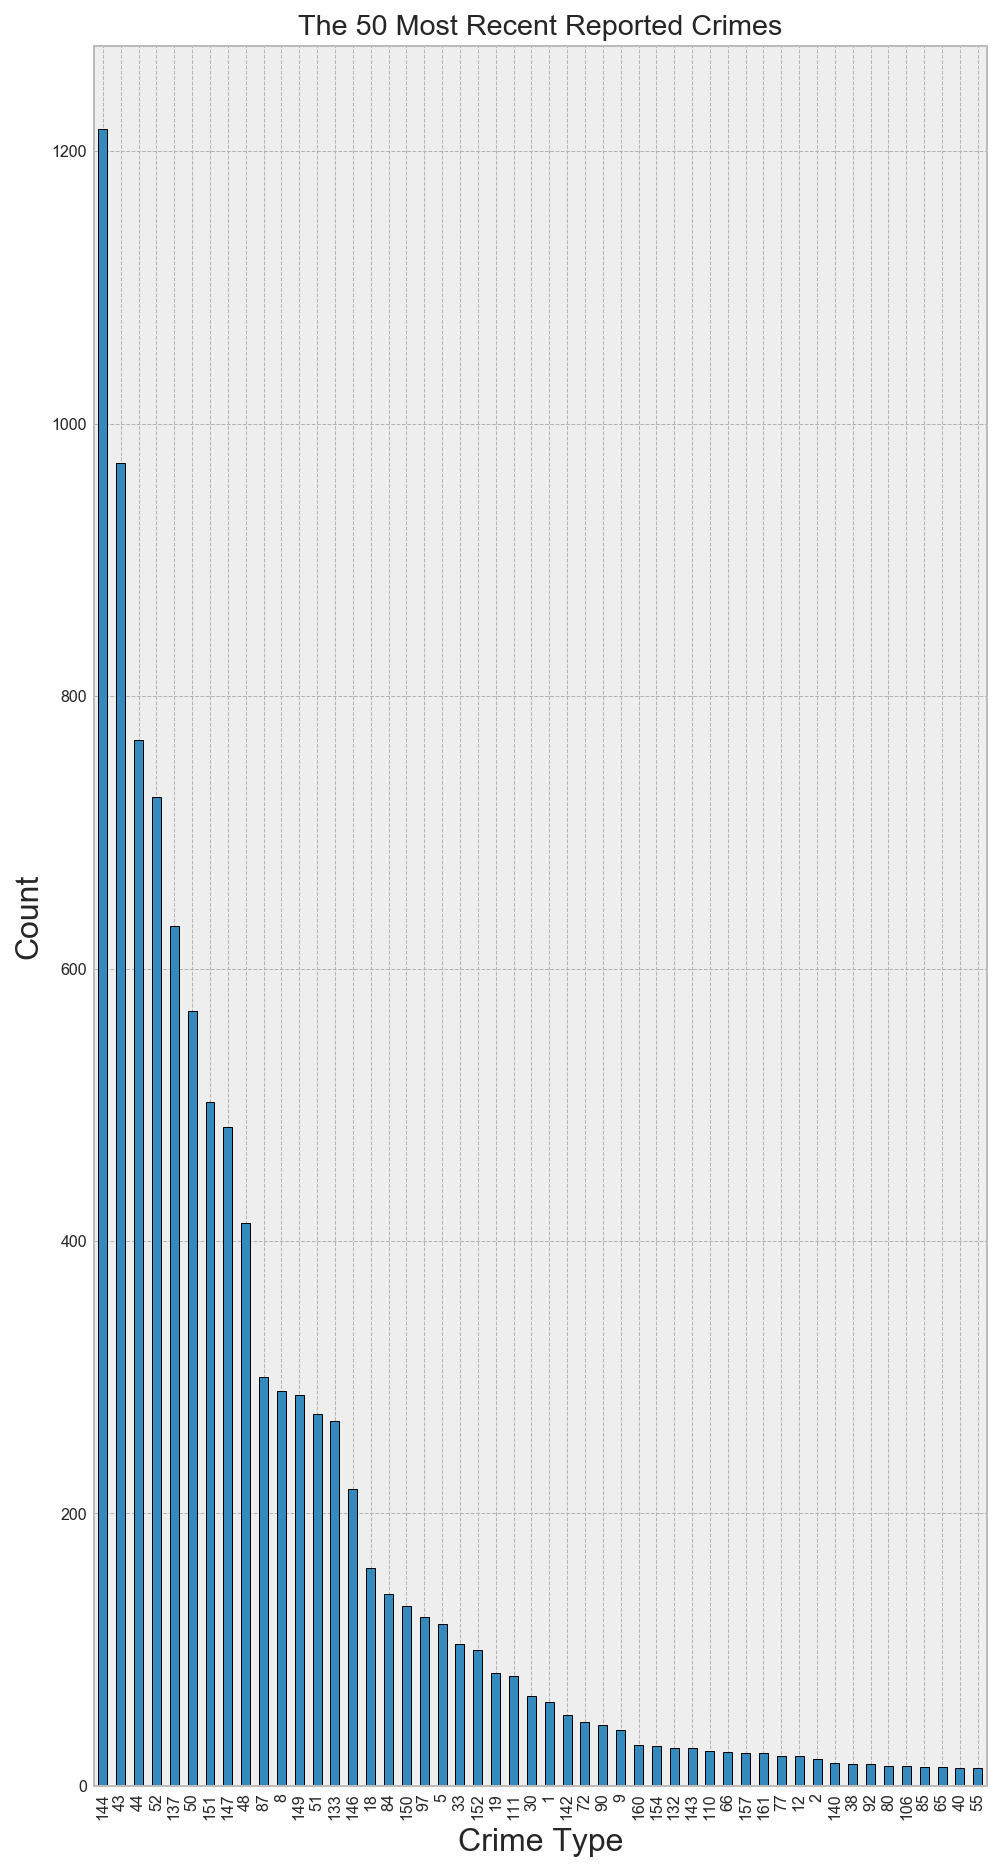

In [268]:
crimeTypes = NumericalNaNs['Offence'].value_counts()[:50]
crimeTypes = pd.DataFrame(crimeTypes)
# Now we can visualize the data with a barplot.

plot = crimeTypes.plot(kind='bar', title='The 50 Most Recent Reported Crimes', figsize=(8, 16), legend=False, fontsize=8, edgecolor = 'black', linewidth=0.5);
plot.set_ylabel('Count', fontsize=16)
plot.set_xlabel('Crime Type', fontsize=16)
plt.show()

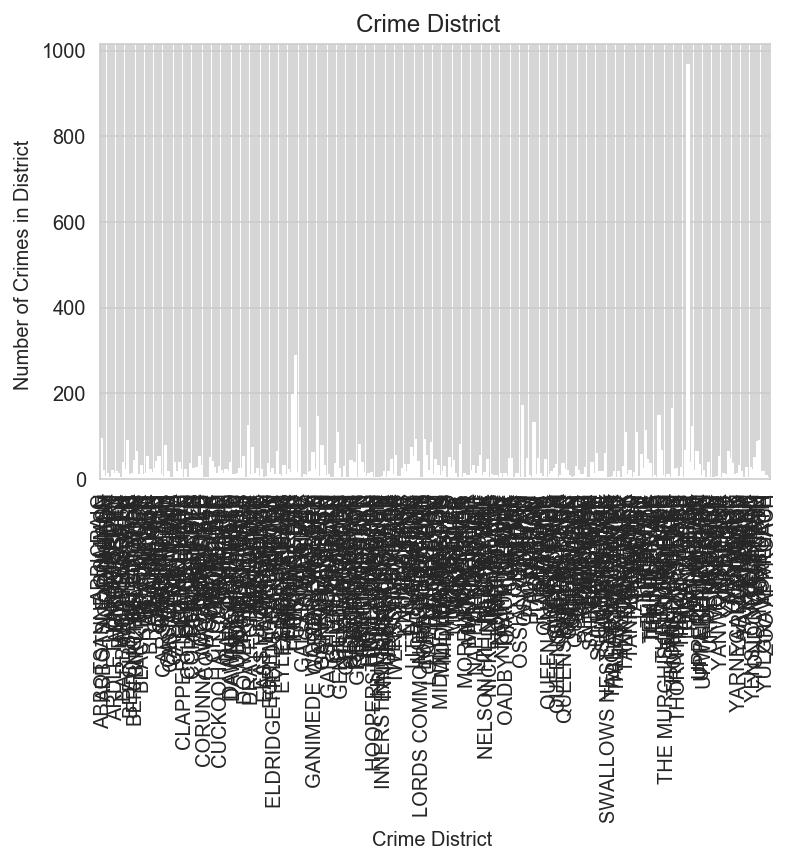

In [12]:
# Make graph of crimes per year
df.groupby([df.District]).size().plot.bar()
plt.title('Crime District  ')
plt.xlabel('Crime District ')
plt.ylabel('Number of Crimes in District ')
plt.show()

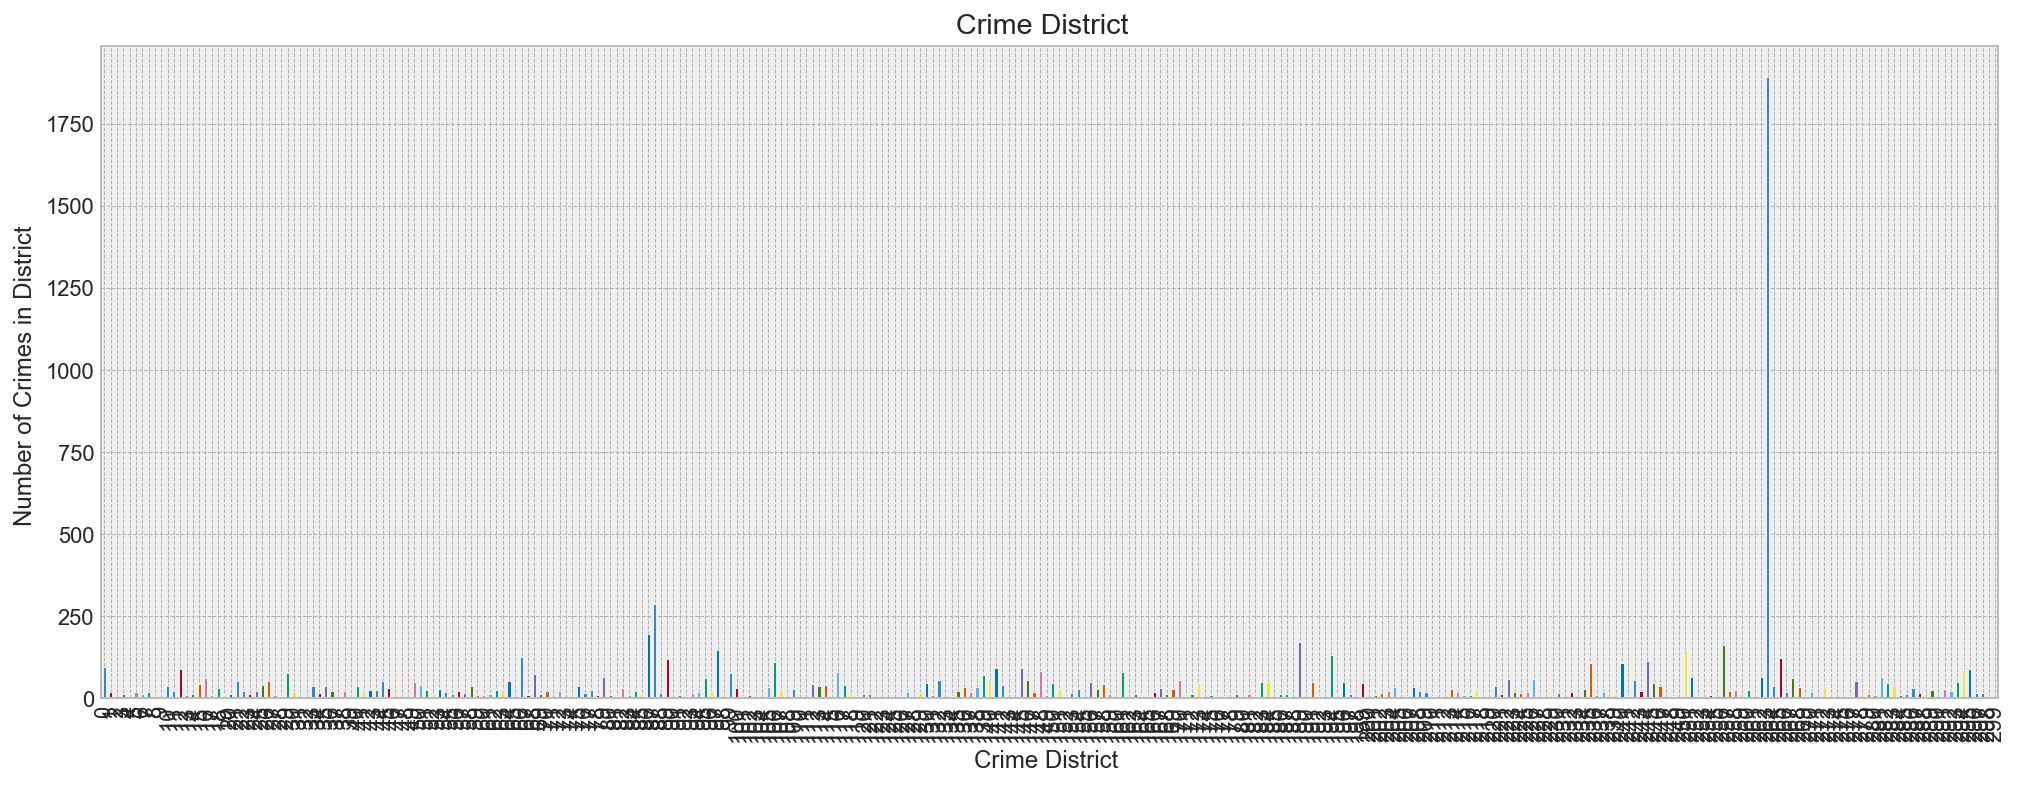

In [269]:
# Make graph of crimes per year
data.groupby([NumericalNaNs.District]).size().plot.bar()
plt.title('Crime District  ')
plt.xlabel('Crime District ')
plt.ylabel('Number of Crimes in District ')
plt.show()

In [ ]:
# Make graph of crimes per year
Crime_Data.groupby([Crime_Data.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [272]:
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd

#df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

#table = ff.create_table(df)
table = ff.create_table(NumericalNaNs, colorscale=colorscale)


py.iplot(table, filename='color_table')
#py.iplot(table, filename='jupyter-table1')

KeyboardInterrupt: 

In [7]:
#Matrix
import missingno

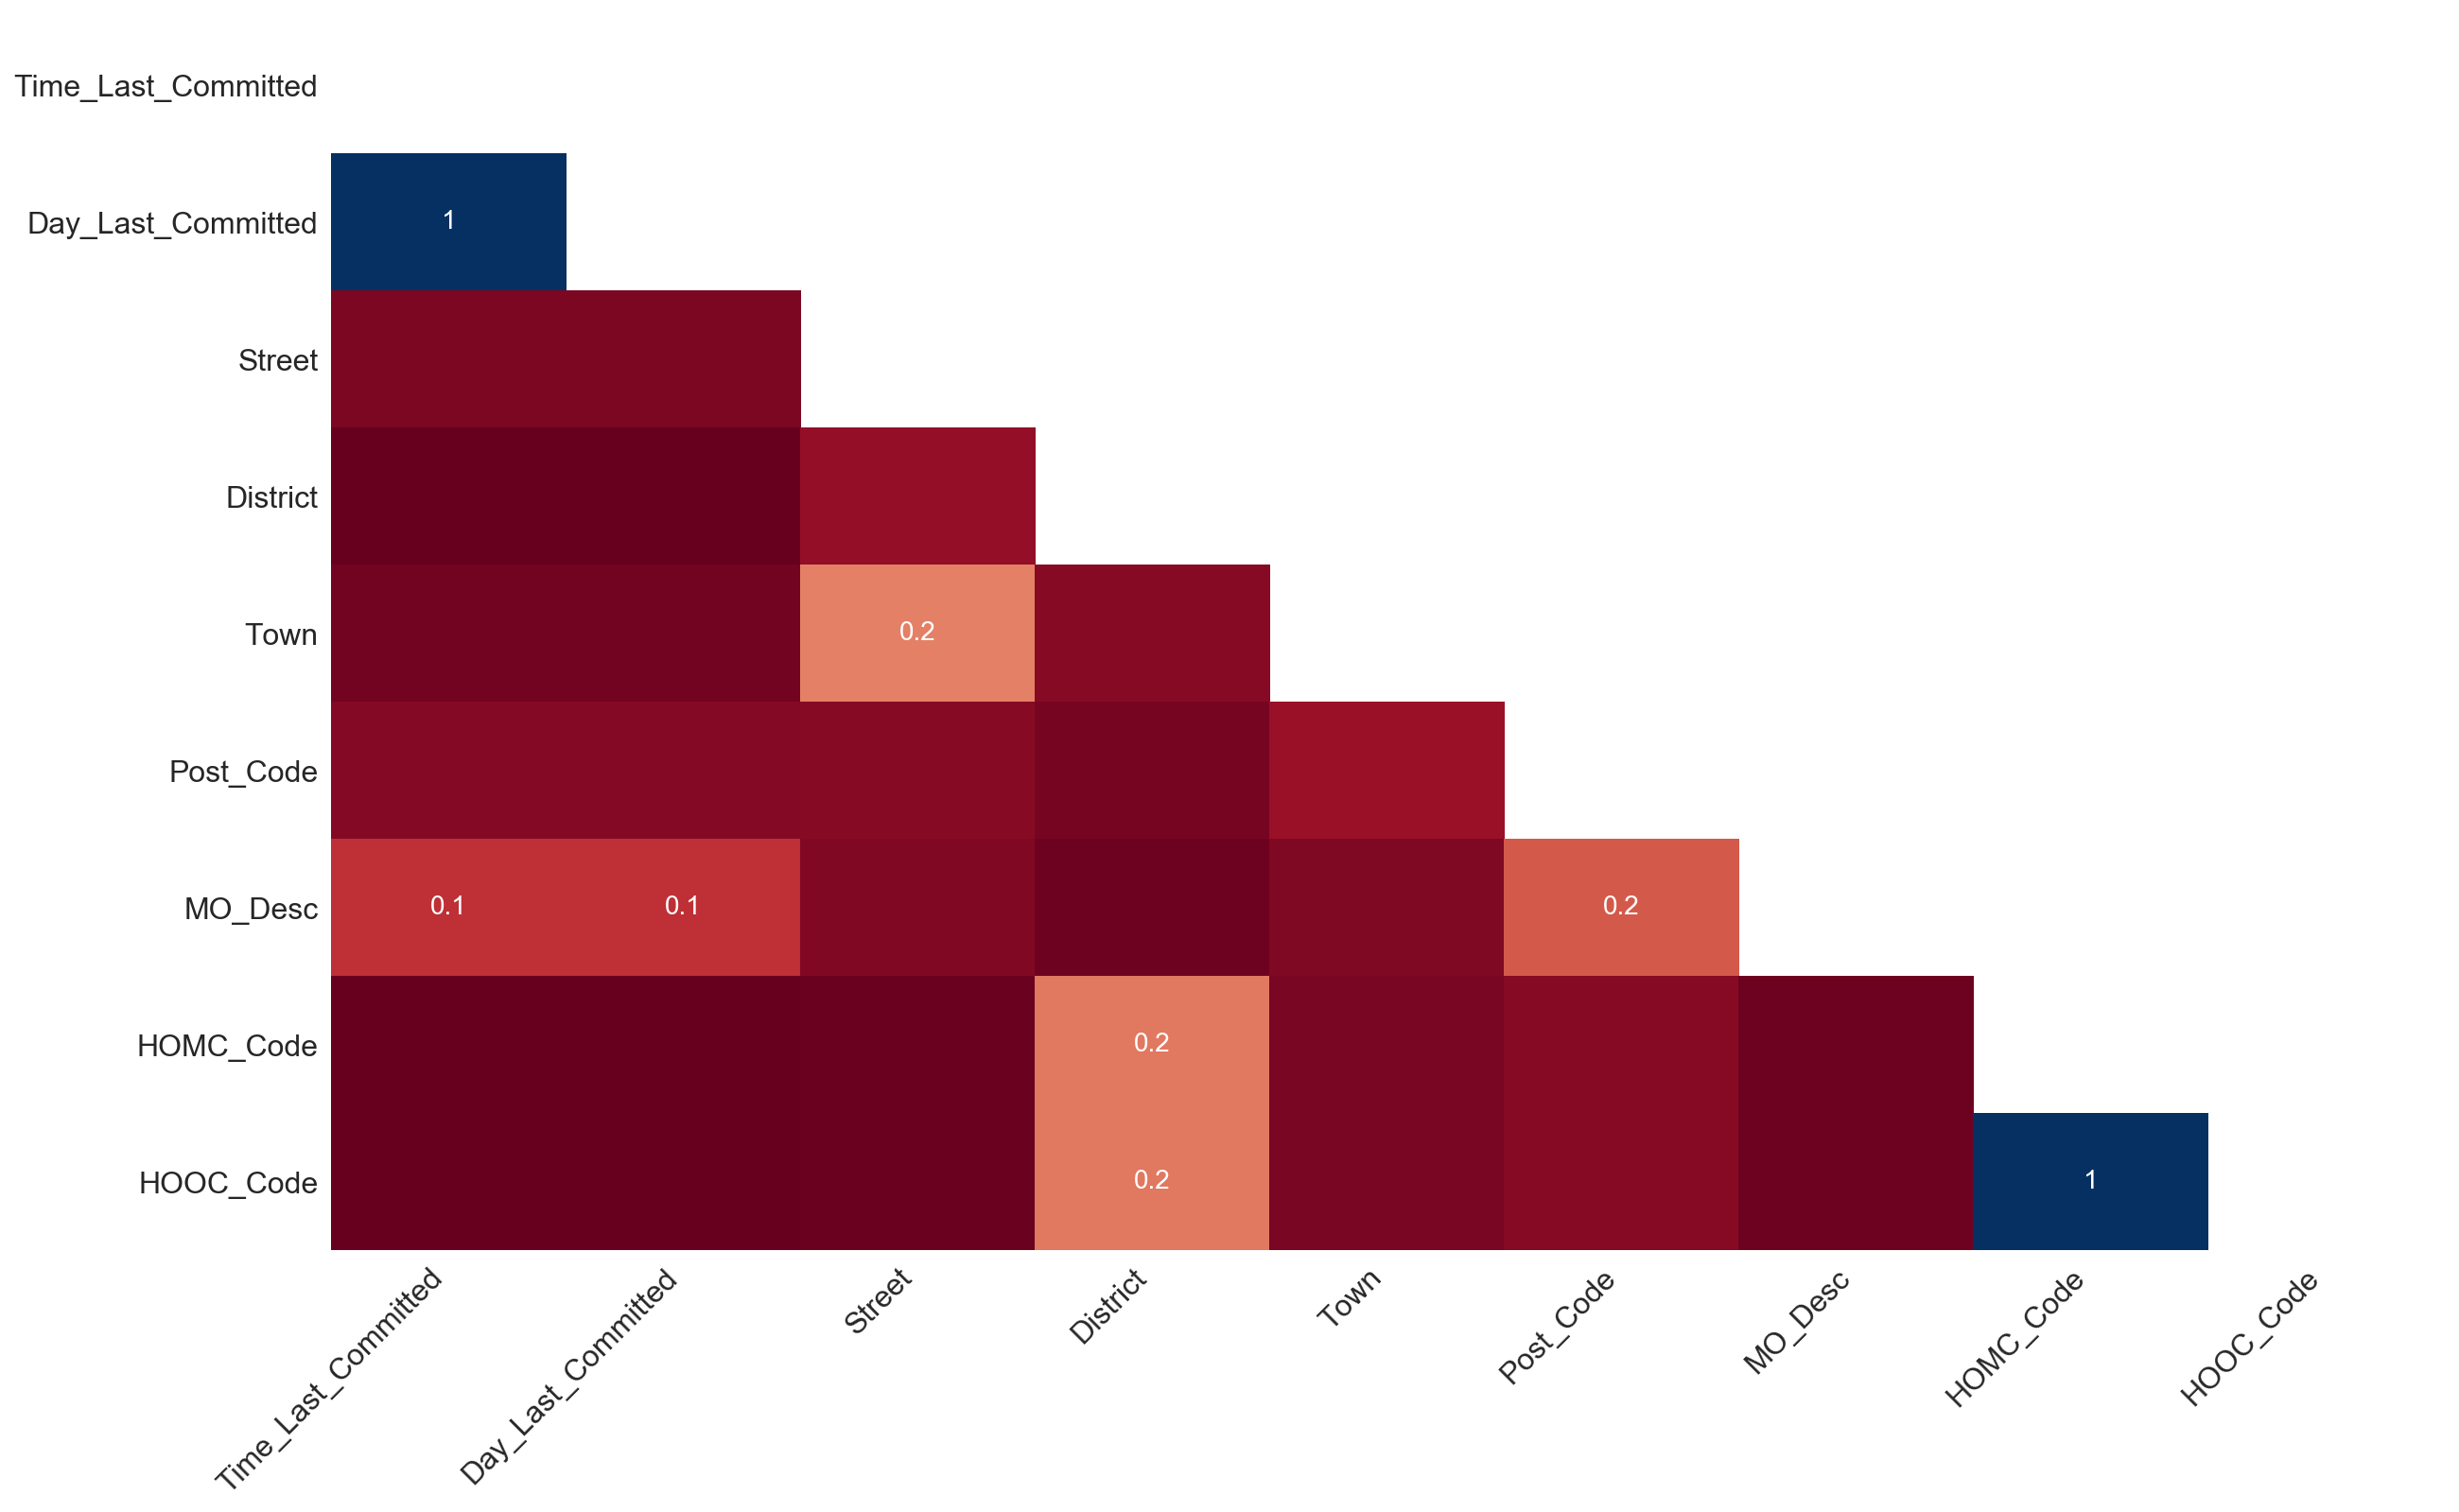

In [8]:
missingno.heatmap(df)

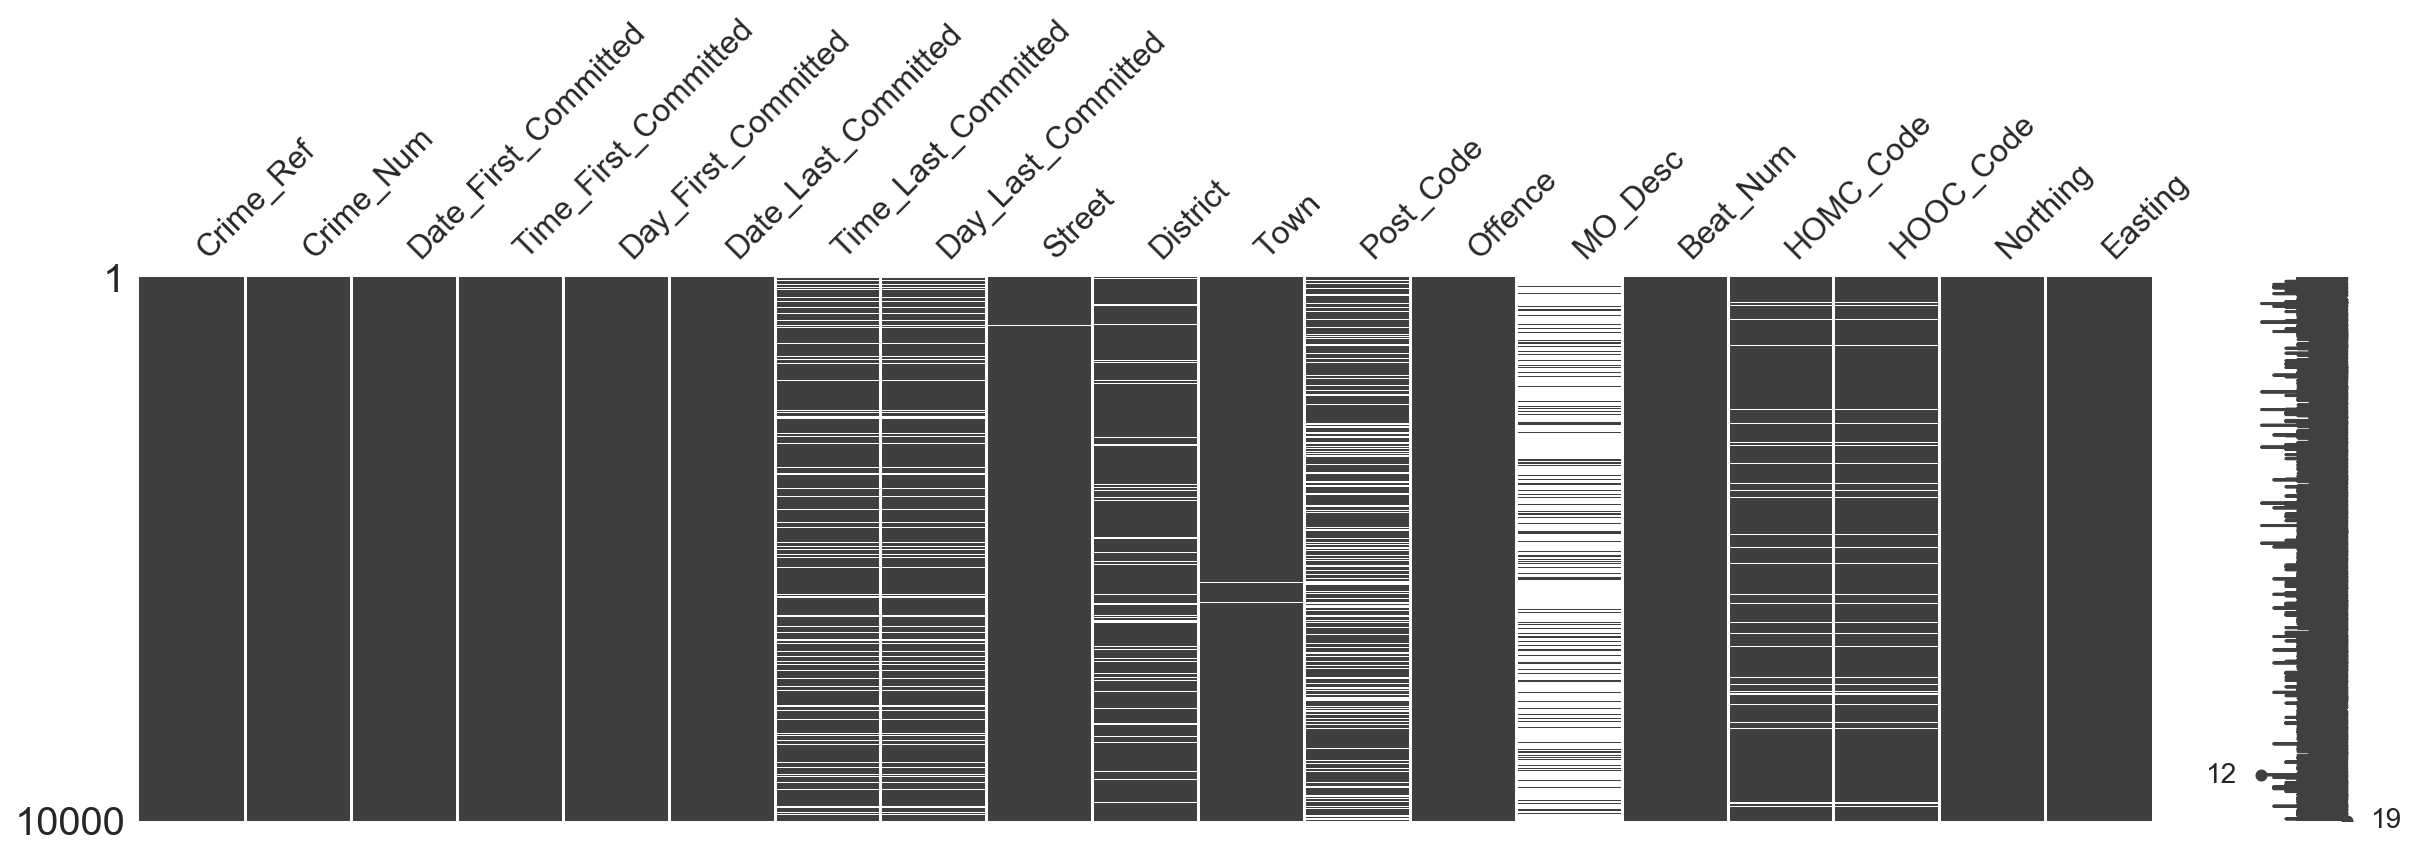

In [9]:
missingno.matrix(df, figsize = (20,5))

In [ ]:
#The heatmap works great for picking out data completeness relationships between variable pairs, 
#but its explanatory power is limited when it comes to larger relationships and it has no particular
#support for extremely large datasets.

In [ ]:
#Bar Chart
#log=True

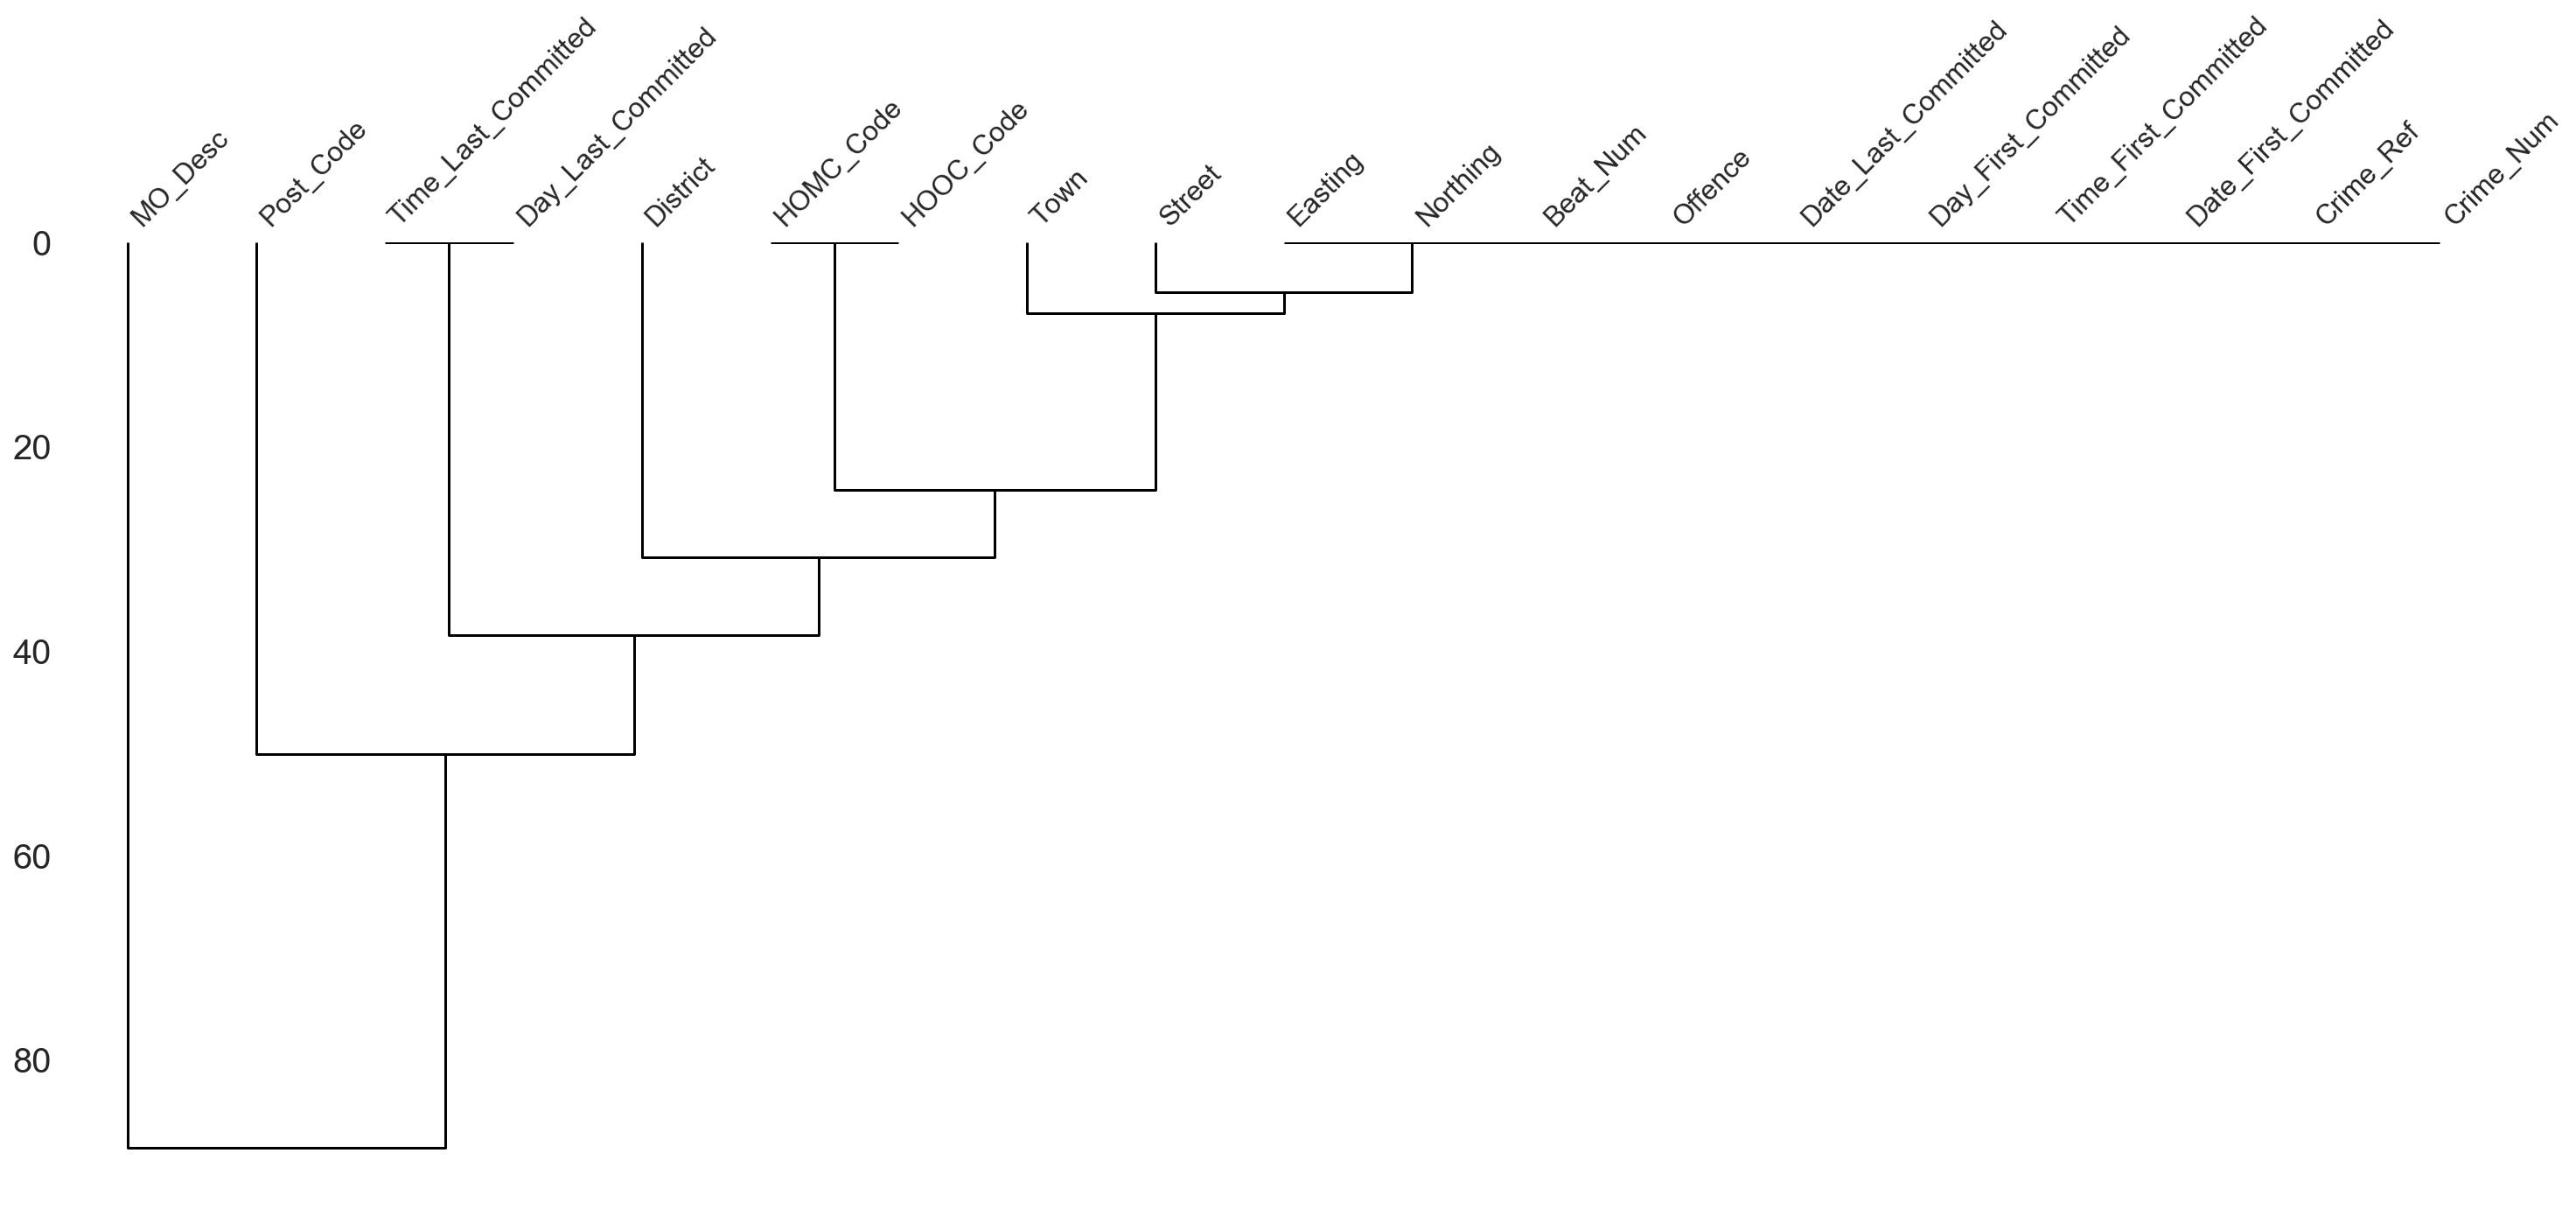

In [15]:
#Dendrogram
#The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:
#The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:
missingno.dendrogram(df)

At a glance, to be completely populated, while geographic information seems mostly complete, but spottier.

We will drop these variables as they dont have much significance in the model learning, or they will create model overfitting

How many records we have and how many features for each record?



<img src = "65110.png" align="left" />
Sometime we cant see diffrent even after droping 

In [ ]:
data.drop_duplicates( keep='first', inplace=True)

In [ ]:
%lsmagic


%%html
<marquee style='width: 30%; color: blue;'><b>Whee!</b></marquee>

missing values exist 


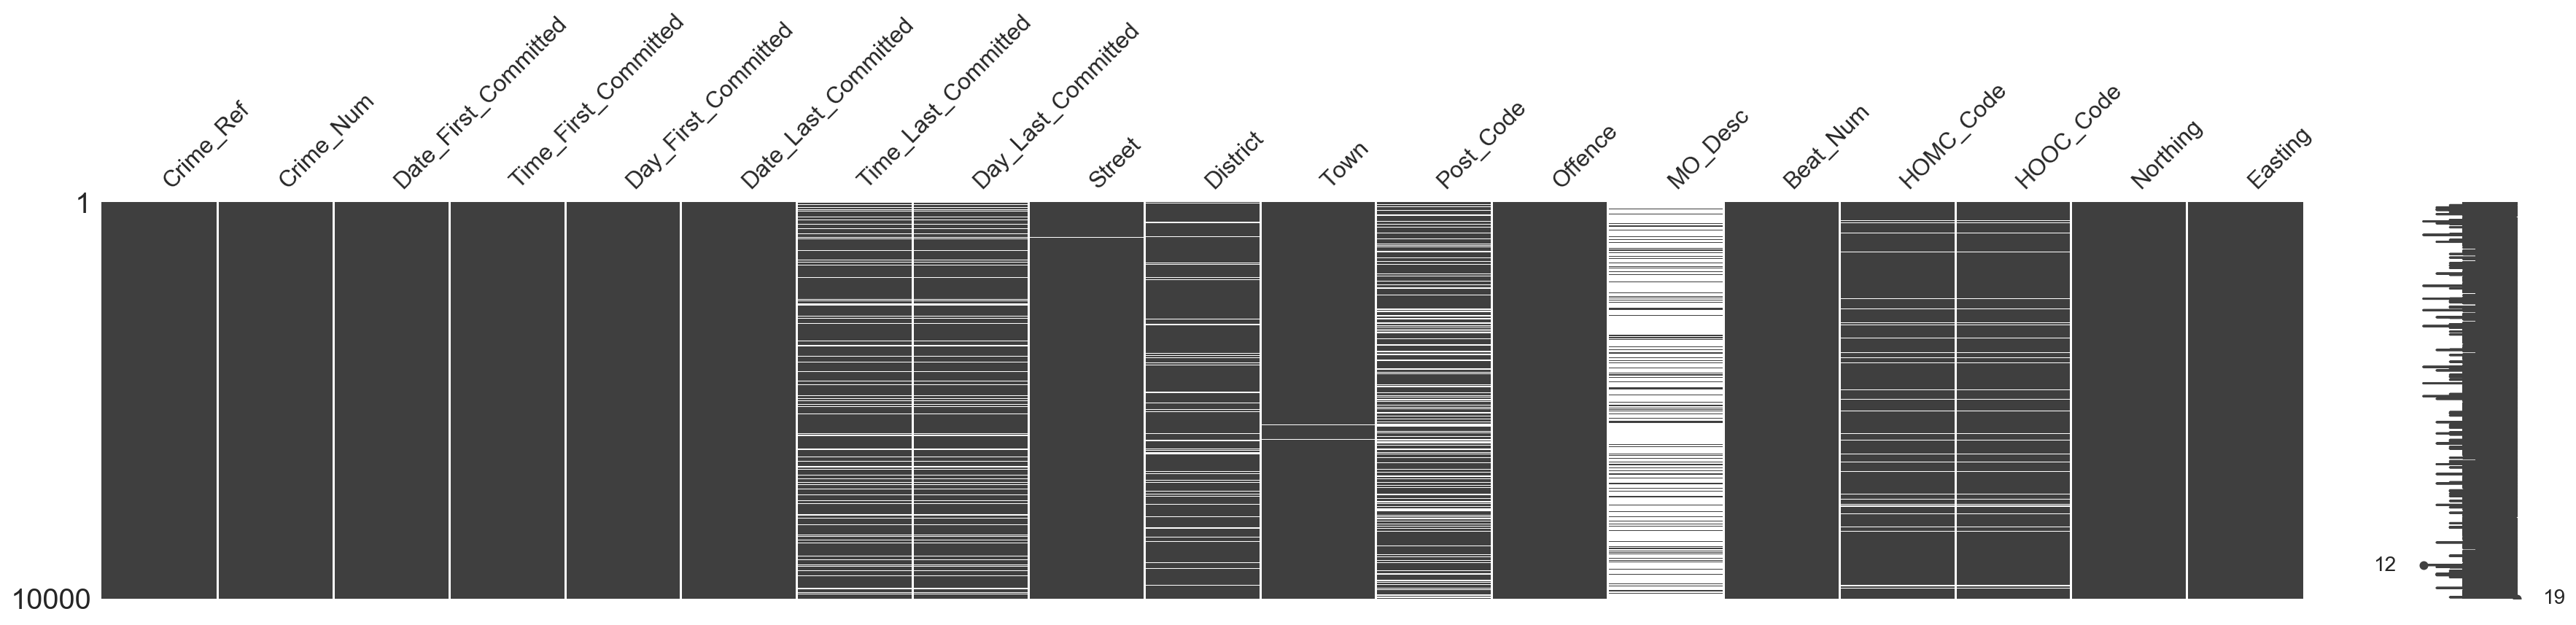

In [16]:
# How many missing values are there in our dataset?
import missingno
print("missing values exist ")
missingno.matrix(df, figsize = (30,5))

In [ ]:
missingno.bar(data, sort='ascending', figsize = (30,5))

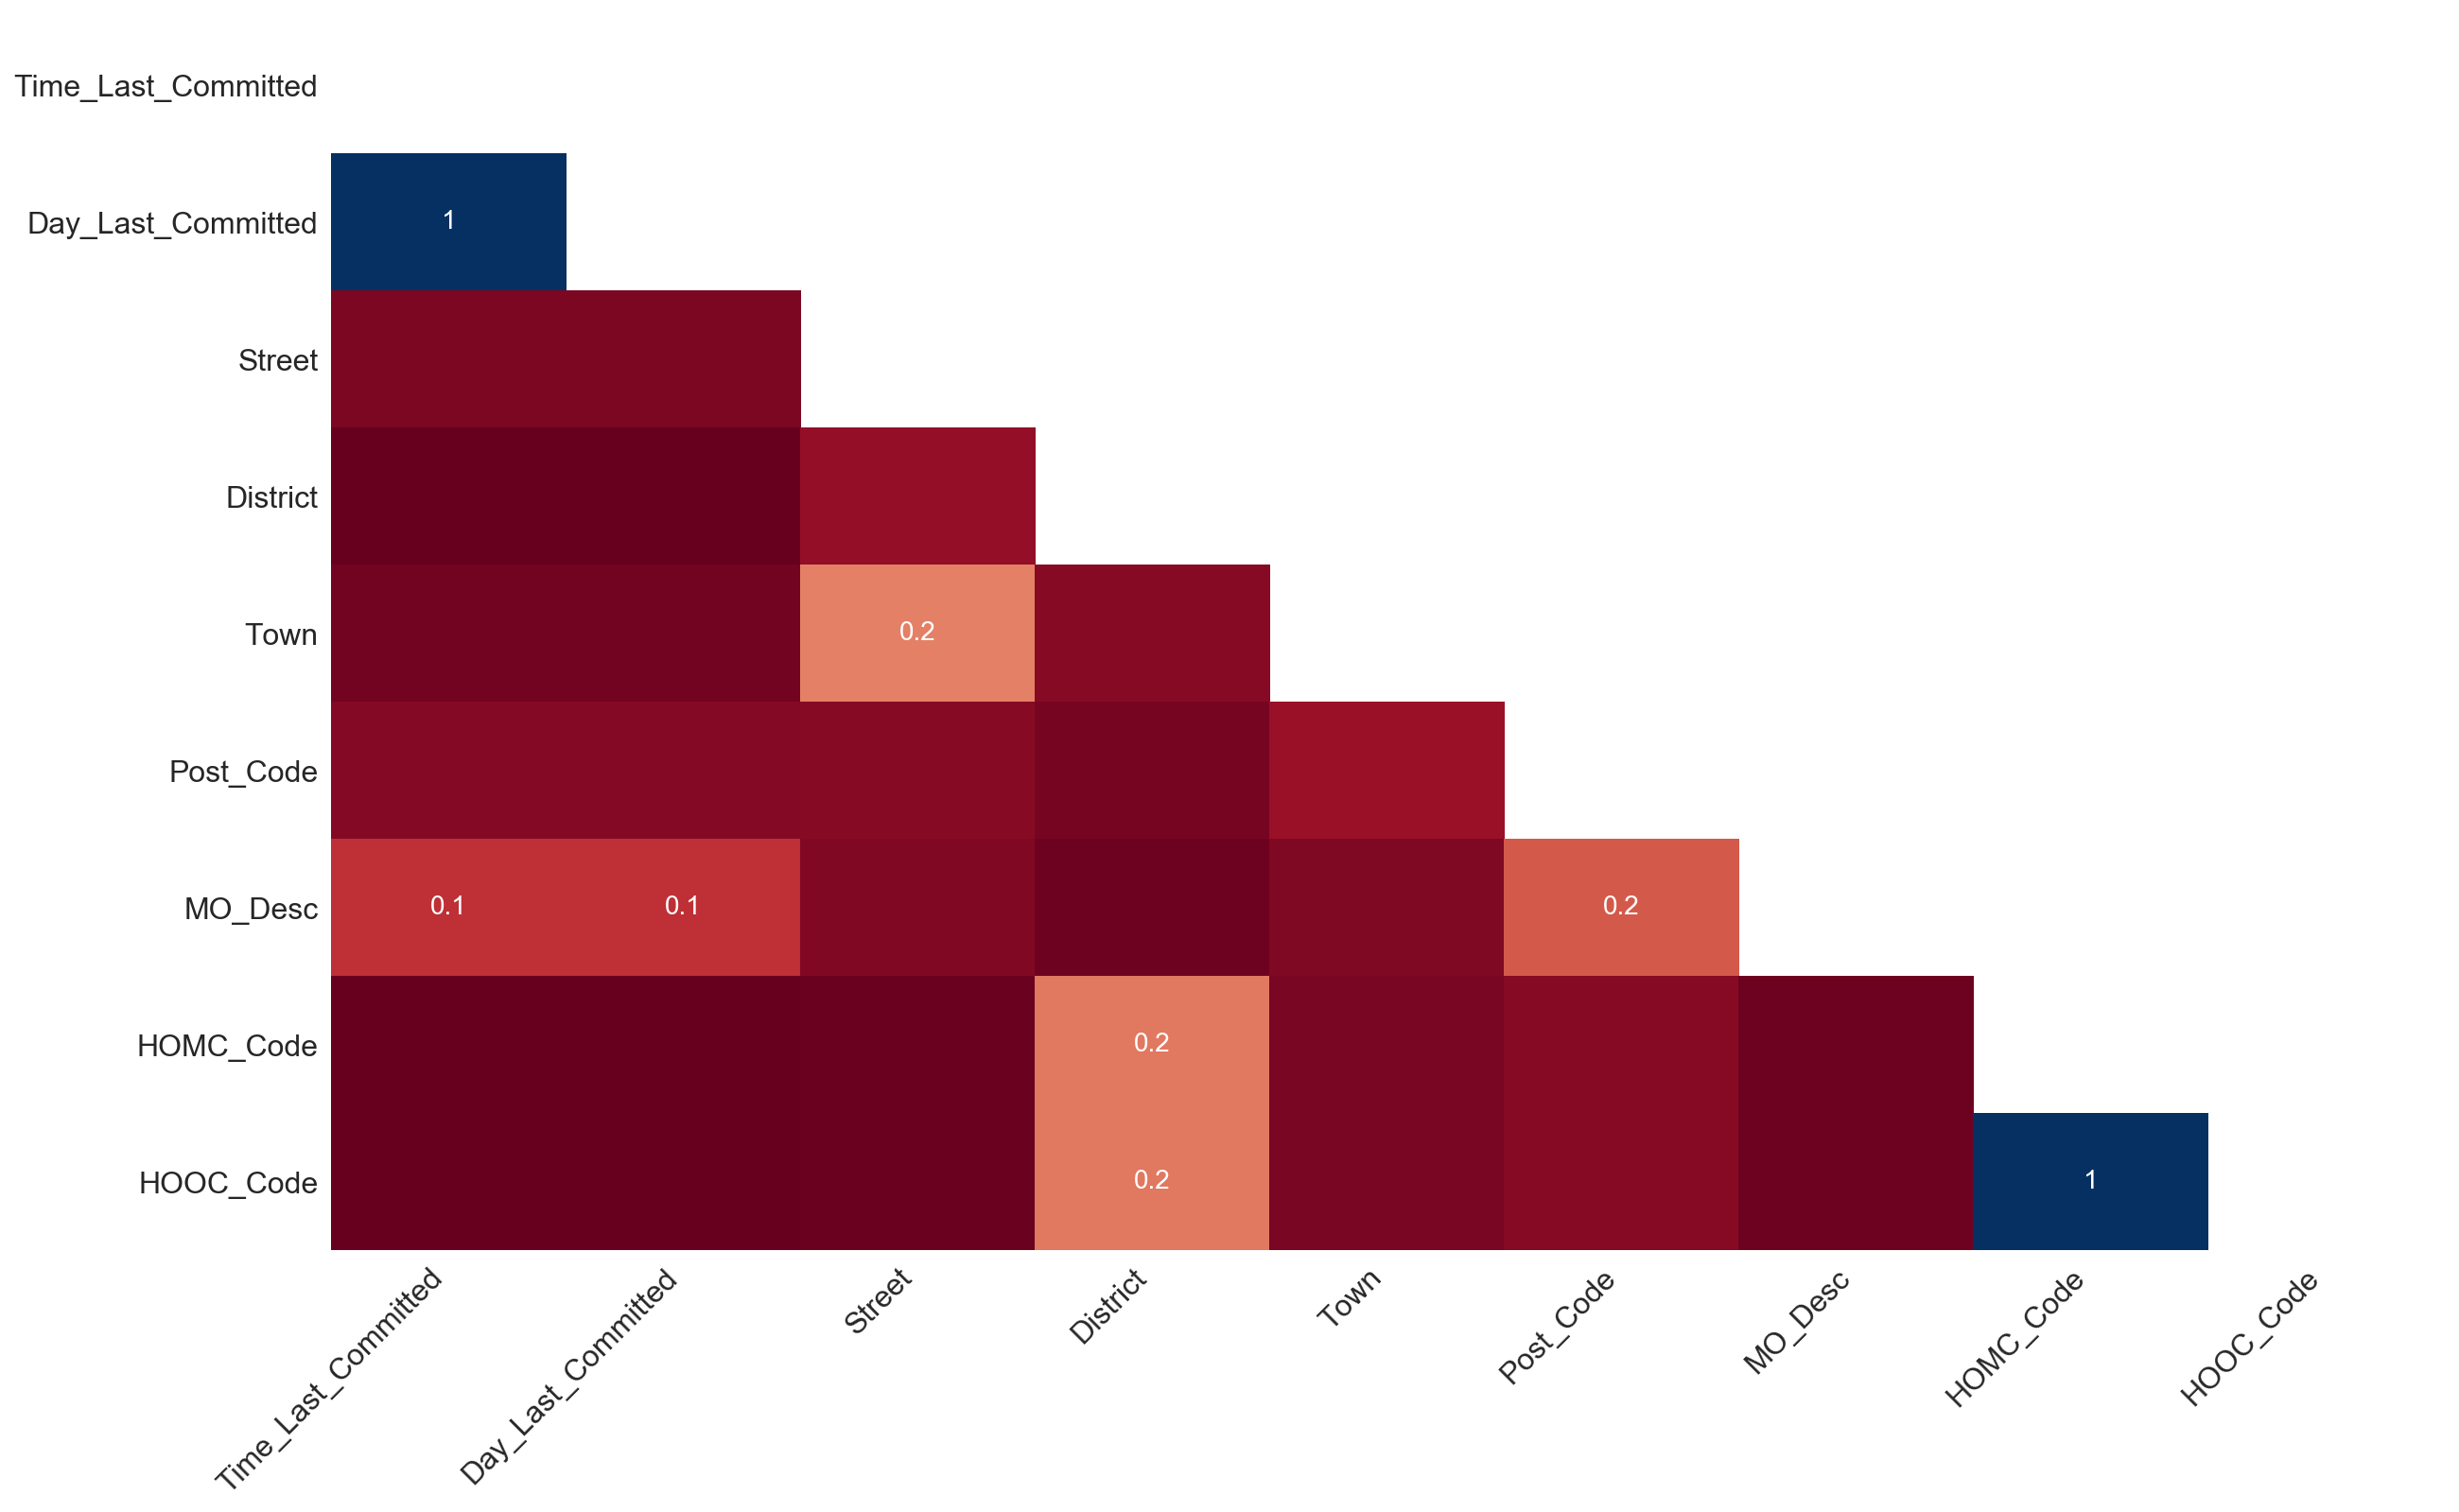

In [17]:
missingno.heatmap(df)

---

In [31]:
'geopandas' in sys.modules

False

---

<a id='section4'></a>

#  Kmean

![](img/asv.jpg)

This is very quick review on K-means algorithms to cluster data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

In [2]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

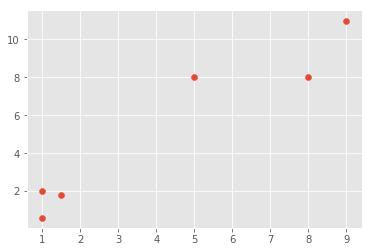

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
plt.show()

In [7]:
X = np.array([[1, 2],
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 1 0 1 0 1]


coordinate: [1. 2.] label: 0
coordinate: [5. 8.] label: 1
coordinate: [1.5 1.8] label: 0
coordinate: [8. 8.] label: 1
coordinate: [1.  0.6] label: 0
coordinate: [ 9. 11.] label: 1


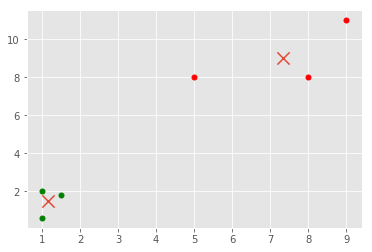

In [9]:
colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()
		

---

### to learn more about juyter please watch this video 

In this Python Tutorial, we will be learning how to install, setup, and use Jupyter Notebooks. Jupyter Notebooks have become very popular in the last few years, and for good reason. They allow you to create and share documents that contain live code, equations, visualizations and markdown text. This can all be run from directly in the browser. It is an essential tool to learn if you are getting started in Data Science, but will also have tons of benefits outside of that field. Let's get started.

In [5]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HW29067qVWk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Thank you for reading this cahpter 

Please visit my webpage for more articles on ML for Big Data 

<a href="https://turkialjrees.com">www.turkialjrees.com</a>


---

   [Return to Top of the page ](#section0) --->